<a href="https://colab.research.google.com/drive/1X1P09nlKGxpfVzkA-wnig0LjImfRgrni#scrollTo=umhxH0NUL7jG" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCO3 Machine Learning

## Loading Dataset

In [1]:
# Importing pandas library
import pandas as pd

In [2]:
# Loading dataset
import os

# Get the current working directory
current_dir = os.getcwd()

filename = "diabetes_dataset.csv"

file_path = os.path.join(current_dir, filename)

df=pd.read_csv(file_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
# Feature variables
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [4]:
# Target variable
y=df.Outcome
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [29]:
# Generation of Descriptive Statistics Table
stats = df.describe().round(2)

styled_stats = stats.style\
    .set_caption('Descriptive Statistics Table for Diabetes Dataset')\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('color', 'Green'), ('font-size', '20px')]
    }, {
        'selector': 'th',
        'props': [('background-color', 'lightgrey'), ('border', '1px solid black')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black')]
    }])

display(styled_stats)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.700000,121.180000,69.150000,20.940000,80.250000,32.190000,0.470000,33.090000,0.340000
std,3.310000,32.070000,19.190000,16.100000,111.180000,8.150000,0.320000,11.790000,0.470000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.370000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.620000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:>

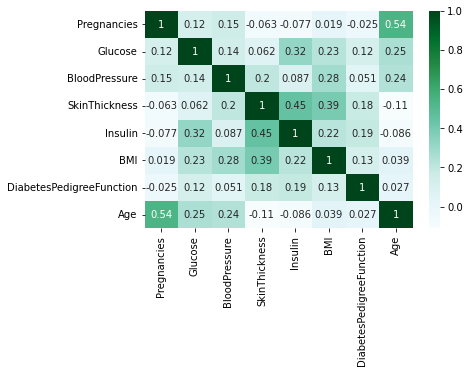

In [6]:
# Correlation 
import seaborn as sns

corr_matrix = x.corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuGn')

In [7]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Splitting dataset into testing and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

## Decision Tree

In [8]:
# Create Decision Tree classifer object
DTmodel = DecisionTreeClassifier()

# Train Decision Tree Classifer
DTmodel = DTmodel.fit(x_train,y_train)

#Predict the response for test dataset
DTy_pred = DTmodel.predict(x_test)

In [9]:
# Evaluation using Accuracy score
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
print("Accuracy Score:",metrics.accuracy_score(y_test, DTy_pred)*100)

Accuracy Score: 95.75


In [10]:
# Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,DTy_pred)

array([[256,  13],
       [  4, 127]])

In [11]:
print("Confusion Matrix Accuracy:",((82+27)/154))

Confusion Matrix Accuracy: 0.7077922077922078


In [12]:
# Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,DTy_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       269
           1       0.91      0.97      0.94       131

    accuracy                           0.96       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.96      0.96       400



In [13]:
# Reviewing prediction value
DTmodel.predict([[2,138,62,35,0,33.6,0.127,47]])

array([1])

In [14]:
# Importing  modules for Visualizing Decision trees
from sklearn.tree import export_graphviz

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [15]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

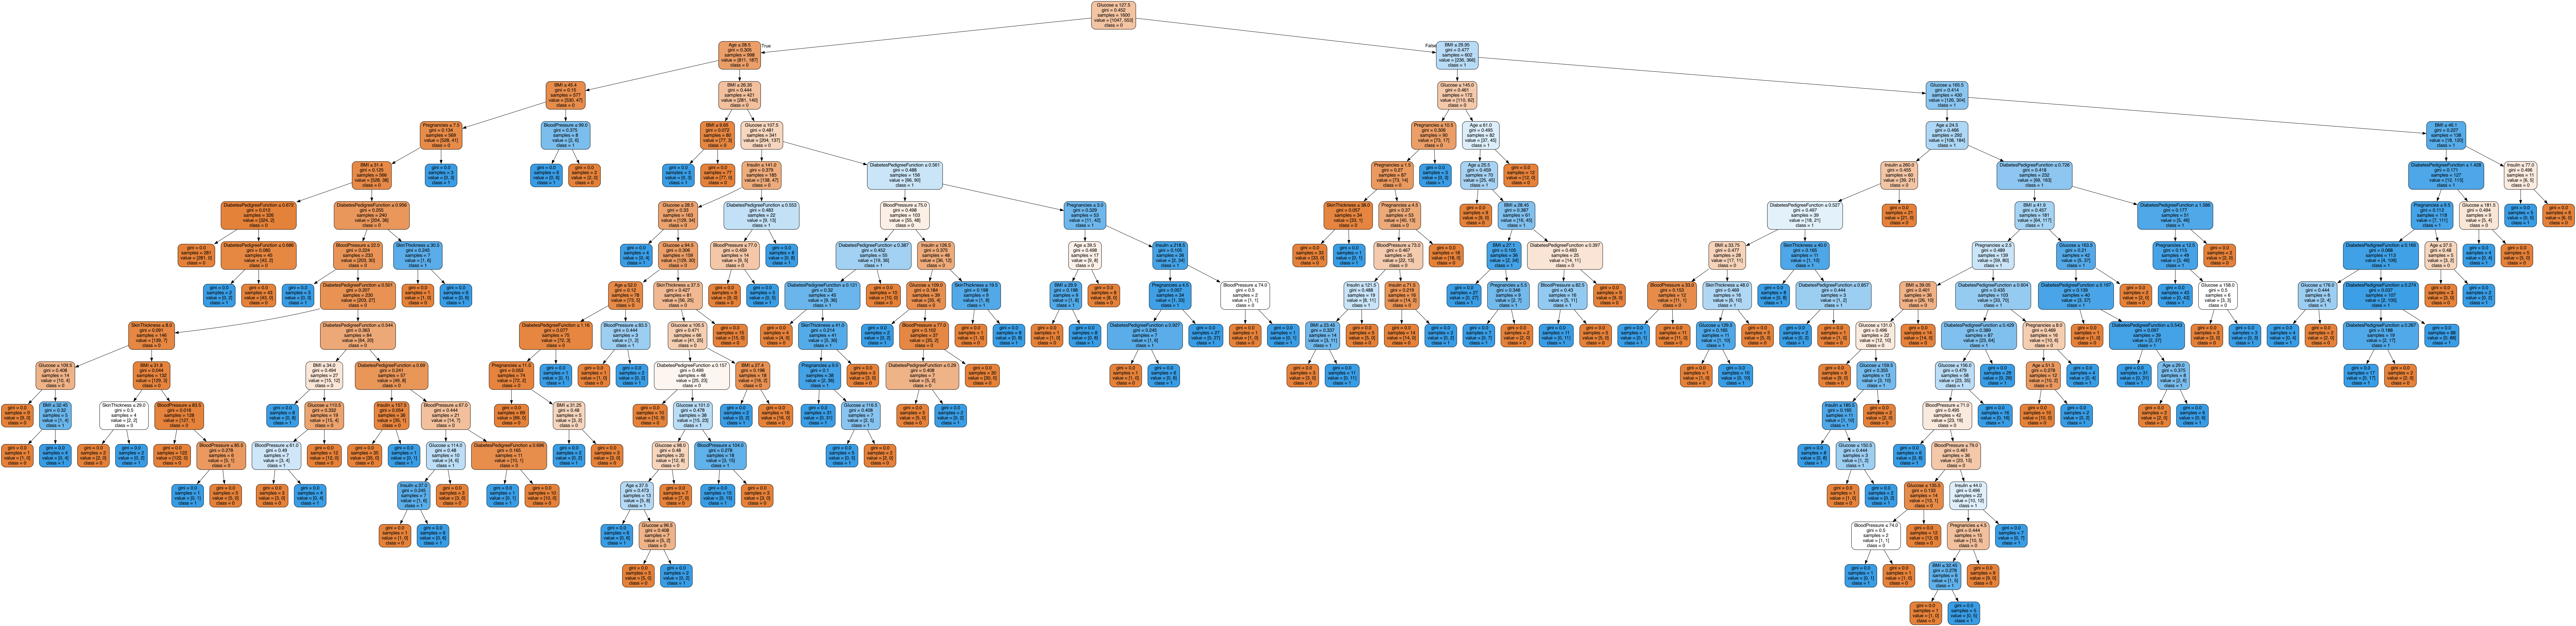

In [16]:
# Decision Tree Model Graph
dot_data = StringIO()
export_graphviz(DTmodel, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [17]:
# Creat Decision Tree Classifer object
DTmodel = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
DTmodel = DTmodel.fit(x_train,y_train)

# Predict response for test dataset
DTy_pred = DTmodel.predict(x_test)

# Model Accuracy
print("Decision Tree Model Accuracy:",metrics.accuracy_score(y_test, DTy_pred)*100)

Decision Tree Model Accuracy: 79.25


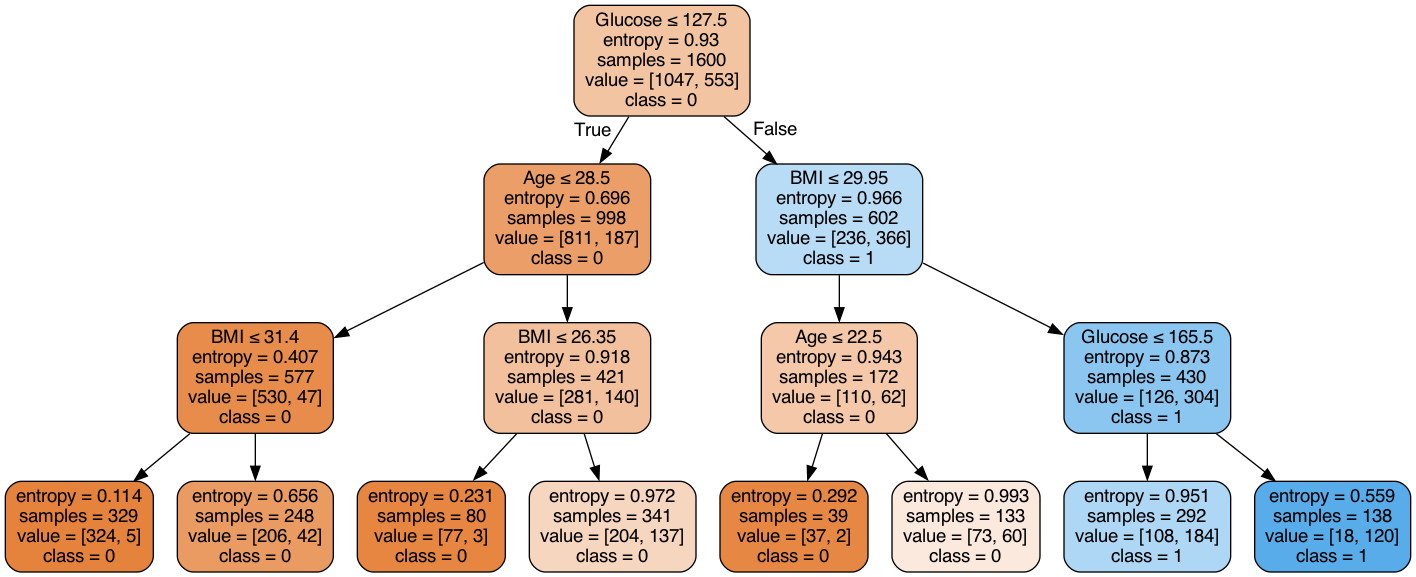

In [18]:
# Simplified Decision Tree Visualisation
dot_data = StringIO()
export_graphviz(DTmodel, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree_simplified.png')
Image(graph.create_png())

## Logistic Regression

In [19]:
# Importing Logistic Regression Module
import sklearn.model_selection as model_selection
import sklearn.linear_model as linear_model

In [20]:
# Create Logistic Regression Object
LRmodel = linear_model.LogisticRegression(penalty='none', verbose=True, max_iter=1000)

LRmodel.fit(X = x_train, y=y_train)

# Predict the response for test dataset
LRy_pred = LRmodel.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [21]:
LRy_pred

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, LRy_pred)*100)

Accuracy: 78.75


In [22]:
y_test

674     0
1699    1
1282    1
1315    0
1210    1
       ..
400     1
763     0
385     0
1667    1
1820    1
Name: Outcome, Length: 400, dtype: int64

In [23]:
metrics.confusion_matrix(y_test, LRy_pred, labels=[2,1,7,3,5,6])

array([[ 0,  0,  0,  0,  0,  0],
       [ 0, 76,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [24]:
print(metrics.classification_report(y_test, LRy_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       269
           1       0.72      0.58      0.64       131

    accuracy                           0.79       400
   macro avg       0.76      0.73      0.75       400
weighted avg       0.78      0.79      0.78       400



In [25]:
# Reviewing prediction value
LRmodel.predict([[0,84,82,31,125,38.2,0.233,23]])

array([0])

In [26]:
print("Accuracy Score:", metrics.accuracy_score(y_test, LRy_pred)*100)

Accuracy Score: 78.75


In [27]:
# Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,LRy_pred)

array([[239,  30],
       [ 55,  76]])

In [28]:
print("Confusion Matrix Accuracy:",((82+27)/154)*100)

Confusion Matrix Accuracy: 70.77922077922078
